# Introduction

The code to implement the Adam optimizer for logistic regression can be found __[HERE](https://github.com/trongdle/trongdle.github.io/blob/main/posts/adam/solutions.py)__.

In this blog post, I will use Adam optimization to conduct some experiments and confirm that Adam optimization is more efficient than stochastic gradient descent. From Kingma and Ba's paper about the Adam algorithm, there are a few factors that contribute to its efficient convergence:
- Adaptive learning rates for each parameter: Adam adapts the learning rate for each parameter based on the historical first and second moments of the gradients, which helps the algorithm to converge quickly and effectively.
- Momentum-based updates: Adam includes a momentum term that helps to smooth out the gradients and speed up convergence.
- Bias correction: Adam uses a bias correction step to correct for the fact that the first and second moments estimates are biased towards zero in the initial stages of training.

Spoiler alert: all the experiments in this blog post go to prove that stochastic gradient descent converges slower than Adam! Adam's efficiency is a direct result of its complexity: implementing the Adam algorithm is more complex than implementing standard stochastic gradient descent, as it involves additional computations for the adaptive learning rates and momentum-based updates.

# A. Stochastic Gradient Descent vs. Adam Optimization

We will use the data given below to compare between stochastic logistic regression and Adam optimization.

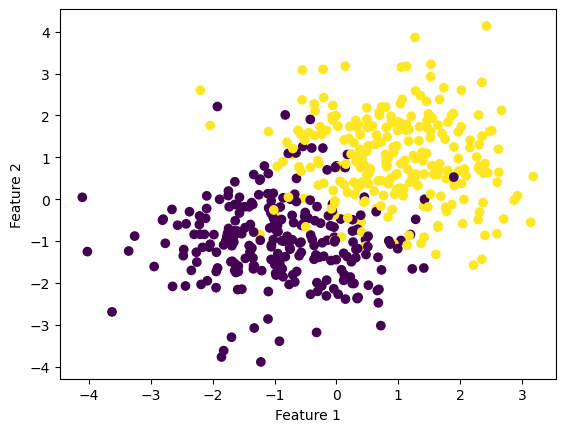

In [2]:
from solutions import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

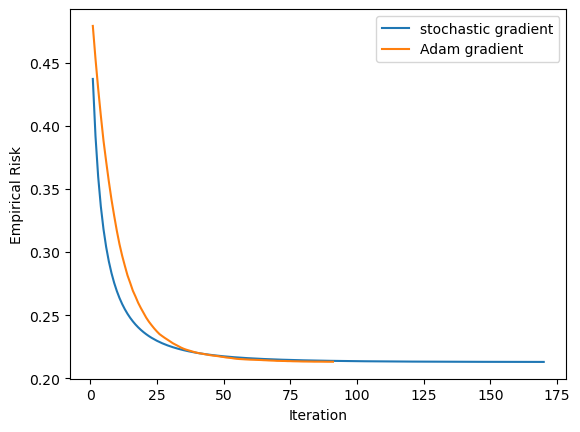

In [4]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .01)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit_adam(X, y, batch_size=10, alpha=0.001, beta1=0.9, beta2=0.999, w_0 = None, epsilon=1e-8, m_epochs=10000)
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "Adam gradient")
plt.xlabel("Iteration")
plt.ylabel("Empirical Risk")
legend = plt.legend() 

The learning rate for the stochastic gradient method is 10 times bigger than that for the Adam method, but the Adam method converges in half the time steps!

# B. Digits Experiment

We will use the `digits` dataset from `sklearn`. I will filter the digits data set so that it only contains data with two class labels, namely 0s and 1s.

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the dataset
digits = load_digits()

# Filter the data to only contain 4s and 8s
X = digits.data[(digits.target == 0) | (digits.target == 1)]
y = digits.target[(digits.target == 0) | (digits.target == 1)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

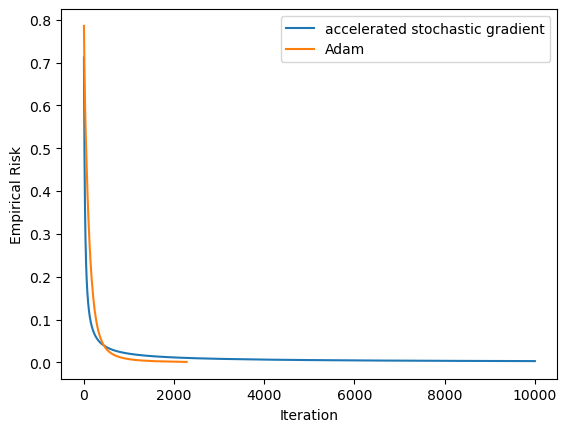

In [31]:
LR_momentum = LogisticRegression()

LR_momentum.fit_stochastic(X_train/255, y_train, 
            m_epochs = 10000, 
            momentum = True, 
            batch_size = 10, 
            alpha = .1)
num_steps = len(LR_momentum.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_momentum.loss_history, label = "accelerated stochastic gradient")

LR_Adam = LogisticRegression()
LR_Adam.fit_adam(X_train/255, y_train, batch_size=10, alpha=0.001, beta1=0.9, beta2=0.999, w_0 = None, epsilon=1e-8, m_epochs=10000)
num_steps = len(LR_Adam.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_Adam.loss_history, label = "Adam")
plt.xlabel("Iteration")
plt.ylabel("Empirical Risk")
legend = plt.legend() 

So it seems that the Adam optimization is much faster than the stochastic gradient with momentum method! And now we will compare their efficiencies on unseen data.

In [22]:
print('The score of the Adam machine is ' + str(LR_Adam.score(X_test/255, y_test)) + '.')
print('The score of the accelerated stochastic gradient method is ' + str(LR_momentum.score(X_test/255, y_test)) + '.')
print('The loss of the Adam machine is ' + str(LR_Adam.loss(X_test/255, y_test)) + '.')
print('The loss of the accelerated stochastic gradient method is ' + str(LR_momentum.loss(X_test/255, y_test)) + '.')

The score of the Adam machine is 1.0.
The score of the accelerated stochastic gradient method is 1.0.
The loss of the Adam machine is 0.49792824663572666.
The loss of the accelerated stochastic gradient method is 0.49792824663572666.


These numbers look the same, but the Adam machine achieved these numbers in a much faster fashion.

# One More Experiment

I will do one more experiment on a dataset that looks like the one in section A, except that there are 80 features.

In [23]:
# make the data
p_features = 81
X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

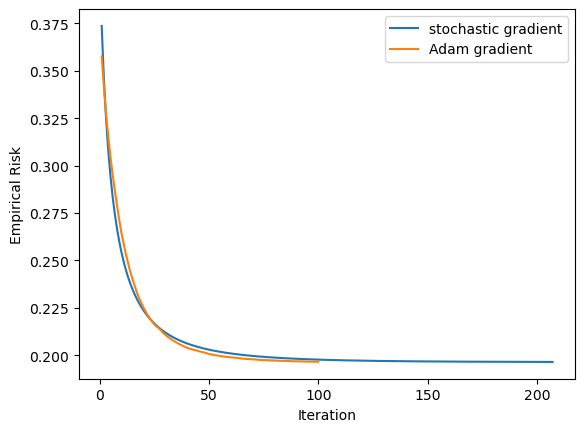

In [30]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .01)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit_adam(X, y, batch_size=10, alpha=0.001, beta1=0.9, beta2=0.999, w_0 = None, epsilon=1e-8, m_epochs=10000)
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "Adam gradient")
plt.xlabel("Iteration")
plt.ylabel("Empirical Risk")
legend = plt.legend() 

The Adam algorithm again comes out on top!